In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [9]:
df = pd.read_excel('./ventas.xlsx', sheet_name='ventas')

In [10]:
df

,id_venta,nombre_cliente,dni,telefono,correo,agente,llamada_realizada,calidad_enviada,verificacion_calidad,observaciones_calidad,fecha_ingreso,observaciones_venta,estado
0,1,Jesus PÃ©rez,N4184,4973,oCmfqGDJ6h@yahoo.com,Rossane,False,False,False,por revisar,2024-05-18,44332211,temporal
1,2,Jesus Delgado,X5338,7576,7OJ33cJ@outlook.com,Rossane,False,False,False,por revisar,2024-03-24,44332211,cancelada
2,3,Luis Covas,X8972,3427,iTwZVevf@hotmail.com,An Yujin,False,False,False,por revisar,2024-03-08,1234569,devuelta
3,4,Will JimÃ©nez,N6995,6117,ylRst@yahoo.com,An Yujin,False,False,False,por revisar,2024-04-28,12233344,devuelta
4,5,Carlos Delgado,B7139,9615,ZgJdR3@outlook.com,ZacksPerez,False,False,False,por revisar,2024-02-10,12233344,cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,492,Juan PÃ©rez,B7942,8614,B72P3CASbQ@hotmail.com,Zacks,False,False,False,por revisar,2024-02-18,1234569,temporal
492,493,Renata JimÃ©nez,B7266,8775,6968El1Vsi@outlook.com,Rossane,False,False,False,por revisar,2024-05-16,12233344,cancelada
493,494,Marlon Coronell,X6956,7539,V0ikNSRaPY@yahoo.com,An Yujin,False,False,False,por revisar,2024-05-16,12233344,activa
494,495,Carlos Gomez,X6878,6347,w5QrswVo99@aol.com,Jean,False,False,False,por revisar,2024-03-28,12233344,activa


In [11]:
df.columns

Index(['id_venta', 'nombre_cliente', 'dni', 'telefono', 'correo', 'agente',
       'llamada_realizada', 'calidad_enviada', 'verificacion_calidad',
       'observaciones_calidad', 'fecha_ingreso', 'observaciones_venta',
       'estado'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_venta               496 non-null    int64         
 1   nombre_cliente         496 non-null    object        
 2   dni                    496 non-null    object        
 3   telefono               496 non-null    int64         
 4   correo                 496 non-null    object        
 5   agente                 496 non-null    object        
 6   llamada_realizada      496 non-null    bool          
 7   calidad_enviada        496 non-null    bool          
 8   verificacion_calidad   496 non-null    bool          
 9   observaciones_calidad  496 non-null    object        
 10  fecha_ingreso          496 non-null    datetime64[ns]
 11  observaciones_venta    496 non-null    int64         
 12  estado                 496 non-null    object        
dtypes: bo

In [16]:
agentes = df['agente'].unique()
agentes

array(['Rossane', 'An Yujin', 'ZacksPerez', 'Zacks', 'Jean'], dtype=object)

In [18]:
estado_venta = df['estado'].unique()
estado_venta

array(['temporal', 'cancelada', 'devuelta', 'tramite alta', 'activa'],
      dtype=object)

Sacar los meses de la fecha de ingreso para posteriormente sacar las ventas de manera mensual

In [33]:
df['mes'] = df['fecha_ingreso'].dt.strftime('%B')


In [34]:
df

,id_venta,nombre_cliente,dni,telefono,correo,agente,llamada_realizada,calidad_enviada,verificacion_calidad,observaciones_calidad,fecha_ingreso,observaciones_venta,estado,mes
0,1,Jesus PÃ©rez,N4184,4973,oCmfqGDJ6h@yahoo.com,Rossane,False,False,False,por revisar,2024-05-18,44332211,temporal,May
1,2,Jesus Delgado,X5338,7576,7OJ33cJ@outlook.com,Rossane,False,False,False,por revisar,2024-03-24,44332211,cancelada,March
2,3,Luis Covas,X8972,3427,iTwZVevf@hotmail.com,An Yujin,False,False,False,por revisar,2024-03-08,1234569,devuelta,March
3,4,Will JimÃ©nez,N6995,6117,ylRst@yahoo.com,An Yujin,False,False,False,por revisar,2024-04-28,12233344,devuelta,April
4,5,Carlos Delgado,B7139,9615,ZgJdR3@outlook.com,ZacksPerez,False,False,False,por revisar,2024-02-10,12233344,cancelada,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,492,Juan PÃ©rez,B7942,8614,B72P3CASbQ@hotmail.com,Zacks,False,False,False,por revisar,2024-02-18,1234569,temporal,February
492,493,Renata JimÃ©nez,B7266,8775,6968El1Vsi@outlook.com,Rossane,False,False,False,por revisar,2024-05-16,12233344,cancelada,May
493,494,Marlon Coronell,X6956,7539,V0ikNSRaPY@yahoo.com,An Yujin,False,False,False,por revisar,2024-05-16,12233344,activa,May
494,495,Carlos Gomez,X6878,6347,w5QrswVo99@aol.com,Jean,False,False,False,por revisar,2024-03-28,12233344,activa,March


Estado de las ventas

In [87]:
estado_ventas = df['estado'].str.split(', ').explode()
contar_estado_ventas = Counter(estado_ventas)
top_estado_ventas = contar_estado_ventas.most_common()
df_estado_ventas = pd.DataFrame(top_estado_ventas, columns=["estado", "contador"])
df_estado_ventas

,estado,contador
0,activa,109
1,cancelada,103
2,devuelta,101
3,temporal,95
4,tramite alta,88


Contar la cantidad de ventas por mes

In [72]:

mes_con_mas_ventas = df['mes'].str.split(', ').explode()
contar_mes = Counter(mes_con_mas_ventas)
top_ventas_por_mes = contar_mes.most_common()
df_ventas_mes = pd.DataFrame(top_ventas_por_mes, columns=["mes", "contador"])
df_ventas_mes

,mes,contador
0,April,105
1,May,102
2,February,100
3,January,100
4,March,89


### Ventas por mes

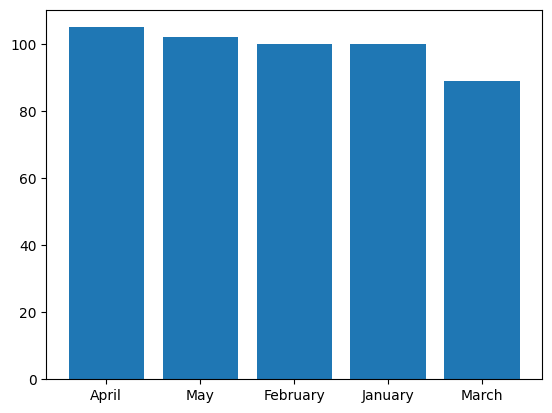

<Figure size 1000x600 with 0 Axes>

In [54]:
plt.bar(df_ventas_mes['mes'], df_ventas_mes['contador'])
plt.figure(figsize=(10, 6))
plt.show()

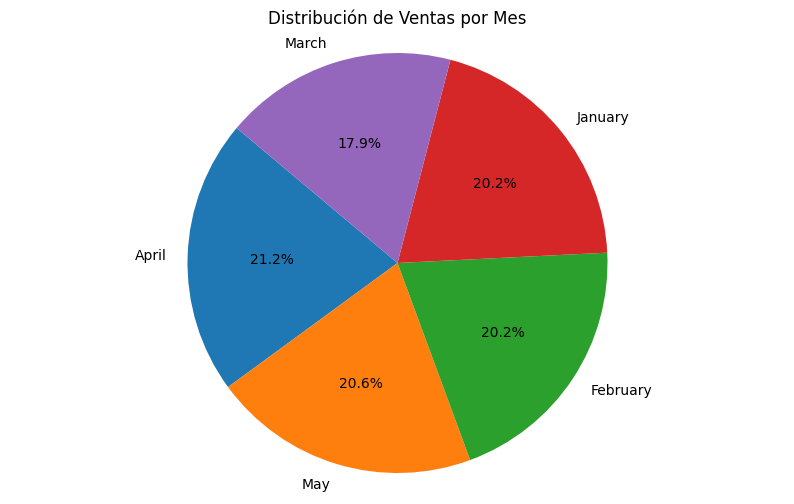

In [65]:
plt.figure(figsize=(10, 6))
plt.pie(df_ventas_mes['contador'], labels=df_ventas_mes['mes'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ventas por Mes')
plt.axis('equal')  # Igualar los ejes para que el gráfico de torta sea un círculo.
plt.show()

### Ventas por agente

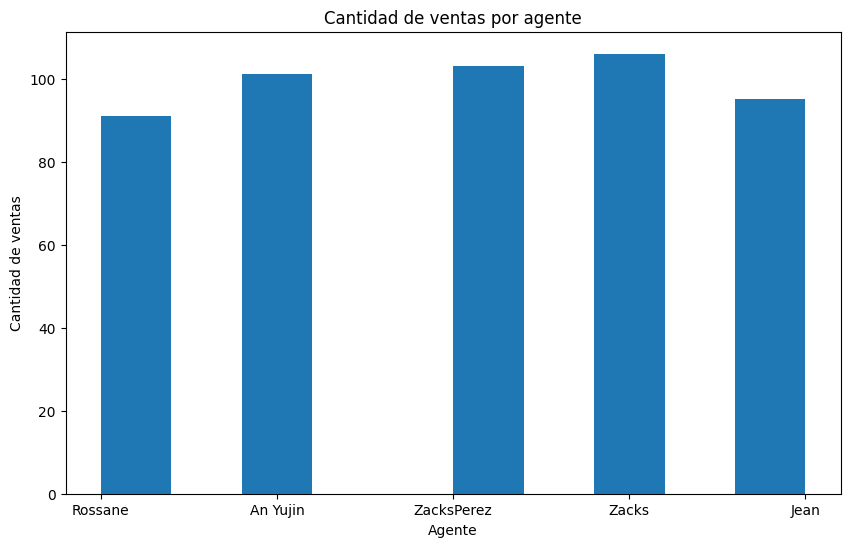

In [66]:
plt.figure(figsize=(10,6))
plt.hist(df["agente"])
plt.xlabel("Agente")
plt.ylabel("Cantidad de ventas")
plt.title("Cantidad de ventas por agente")
plt.show()

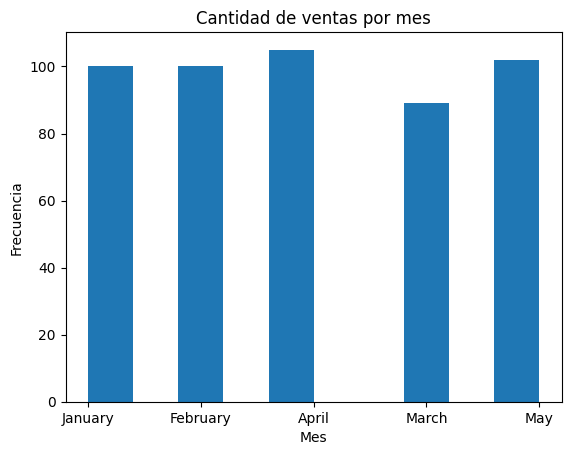

In [94]:
plt.hist(df["mes"])
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.title("Cantidad de ventas por mes")
plt.gca().invert_xaxis()  # Invertir el eje y para que el escritor con la calificación más alta esté en la parte superior

plt.show()

### Estado de las ventas en general

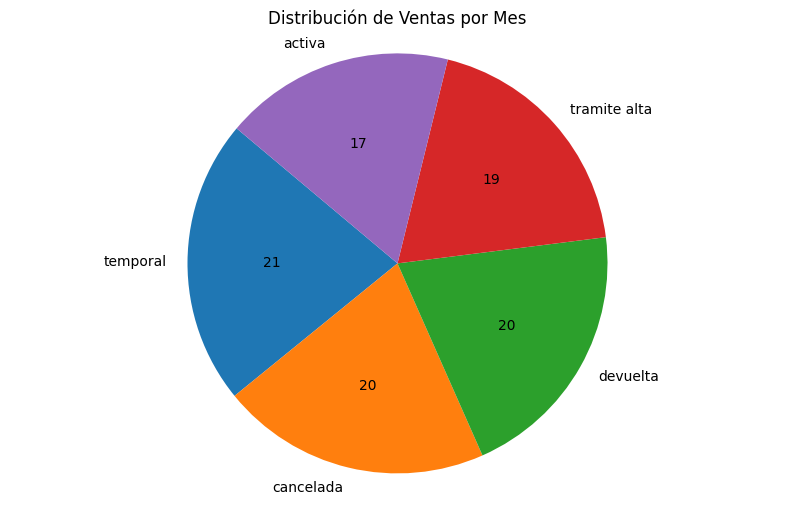

In [121]:
plt.figure(figsize=(10, 6))
plt.pie(df['estado'].value_counts(), labels=df['estado'].unique(), autopct='%d', startangle=140)
plt.title('Distribución de Ventas por Mes')
plt.axis('equal')  # Igualar los ejes para que el gráfico de torta sea un círculo.
plt.show()

## Mostrar el estado de las ventas por mes

In [116]:
estado_agrupado_mes = df.groupby(['mes', 'estado']).size().unstack(fill_value=0)

In [117]:
estado_agrupado_mes_totales = estado_agrupado_mes.copy()
estado_agrupado_mes_totales['Total'] = estado_agrupado_mes.sum(axis=1)

estado_agrupado_mes_totales

estado,activa,cancelada,devuelta,temporal,tramite alta,Total
mes,,,,,,
April,27,13,24,28,13,105
February,21,22,14,18,25,100
January,20,21,18,23,18,100
March,13,26,20,17,13,89
May,28,21,25,9,19,102


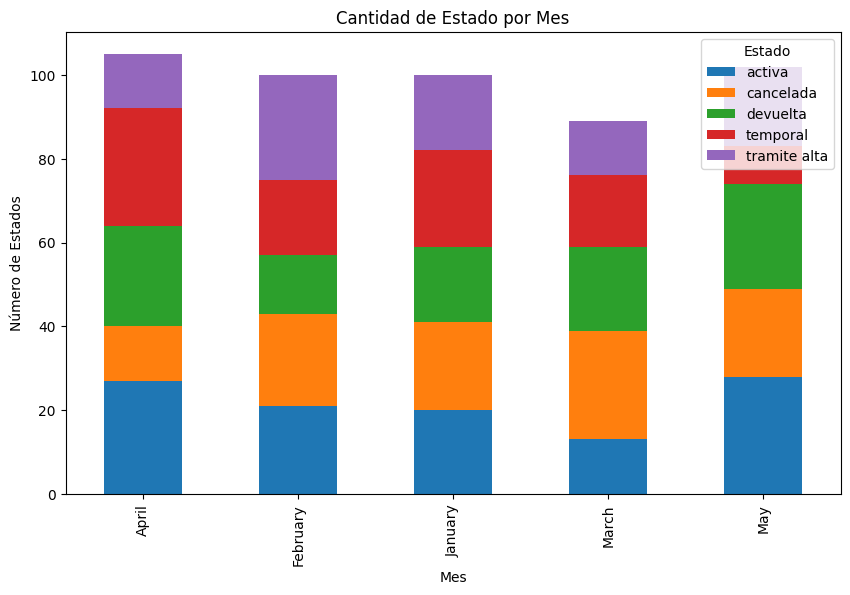

In [119]:
estado_agrupado_mes.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Cantidad de Estado por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Estados')
plt.legend(title='Estado')
plt.show()

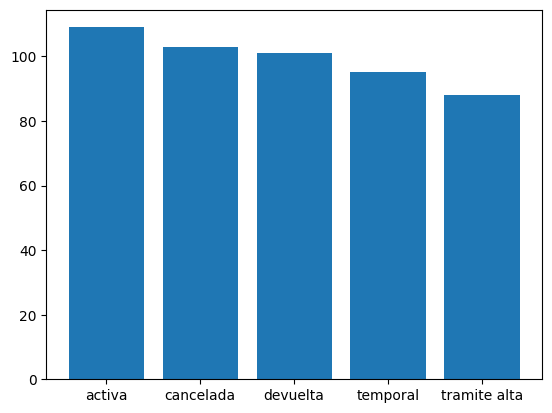

In [92]:
plt.bar(df_estado_ventas['estado'], df_estado_ventas['contador'])
plt.show()